**Load required libraries**

In [1]:
import glob
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.axes import Axes

import satpy
from satpy.scene import Scene
from satpy import find_files_and_readers
from satpy.writers import get_enhanced_image
import pyresample as prs
from satpy.enhancements.overlays import add_overlay

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)


/var/folders/4q/by3lqw_x3cd0qthd139_q_zw000cm7/T/ipykernel_3791/183414720.py:11: UserWarning: 'satpy.writers.get_enhanced_image' has been moved to 'satpy.enhancements.enhancer.get_enhanced_image'. Import from the new location instead (ex. 'from satpy.enhancements.enhancer import get_enhanced_image'). The old import paths will be removed in Satpy 1.0
  from satpy.writers import get_enhanced_image


<hr>

## Imagery from Carribean Sea case

In [2]:
file_name = glob.glob('./MODIS_CS2/*.hdf')
scn_cs  =Scene(file_name,reader='modis_l1b')
scn_cs.load(["1", "3", "4"])
composite_ids = ['true_color']
scn_cs.load(composite_ids, upper_right_corner='NE')

No rsr file /Users/cneumaie/Library/Application Support/pyspectral/rsr_modis_Aqua.h5 on disk
No spectral responses for this platform and sensor: Aqua modis
Traceback (most recent call last):
  File "/Users/cneumaie/opt/miniconda3/envs/modis/lib/python3.14/site-packages/pyspectral/rayleigh.py", line 306, in _get_rsr_wavelength_from_band_name
    rsr = RelativeSpectralResponse(platform_name, sensor)
  File "/Users/cneumaie/opt/miniconda3/envs/modis/lib/python3.14/site-packages/pyspectral/rsr_reader.py", line 136, in __init__
    self._check_consistent_input()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/cneumaie/opt/miniconda3/envs/modis/lib/python3.14/site-packages/pyspectral/rsr_reader.py", line 151, in _check_consistent_input
    self._check_filename_exist()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/cneumaie/opt/miniconda3/envs/modis/lib/python3.14/site-packages/pyspectral/rsr_reader.py", line 196, in _check_filename_exist
    raise IOError(errmsg)
OSError: pyspectral RSR f

In [3]:
# scn_cs.available_composite_ids()

In [4]:
## Get inputs for resampleing
%run coord2area_def.py cs_area_1km laea 16 19.5 -76 -72 1

### +proj=laea +lat_0=17.75 +lon_0=-74.0 +ellps=WGS84

cs_area_1km:
  description: cs_area_1km
  projection:
    proj: laea
    ellps: WGS84
    lat_0: 17.75
    lon_0: -74.0
  shape:
    height: 387
    width: 428
  area_extent:
    lower_left_xy: [-214075.910145, -192558.111924]
    upper_right_xy: [214075.910145, 194831.048729]


In [5]:
from pyresample import get_area_def

area_id = 'cs_area_1km'

x_size = 428
y_size = 387
area_extent = (-214075.910145, -192558.111924,214075.910145, 194831.048729)
projection = '+proj=laea +lat_0=17.75 +lon_0=-74.0 +ellps=WGS84'
description = "Caribbean Sea"
proj_id = 'laea_1775_73'

areadef = get_area_def(area_id, description, proj_id, projection,x_size, y_size, area_extent)
scn_cs_resample_nc = scn_cs.resample(areadef)

In [6]:
# scn_cs.show("true_color")

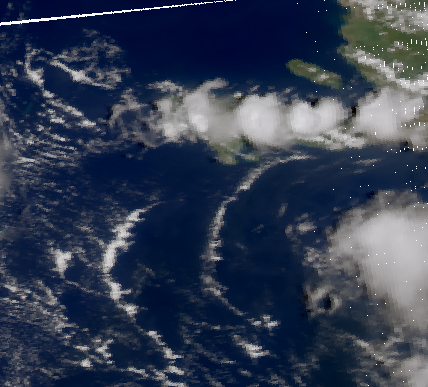

In [7]:
## Check extent
scn_cs_resample_nc.show('true_color')

In [8]:
enhanced_img_cs = get_enhanced_image(scn_cs_resample_nc["true_color"])
rgb_cs = enhanced_img_cs.data.transpose("y","x","bands")
crs_cs = scn_cs_resample_nc["true_color"].attrs["area"].to_cartopy_crs()
style = "/Users/cneumaie/OneDrive - Colostate/Styles/christine-paperlight.mpstyle"
plt.style.use(style)

Duplicate key in file '/Users/cneumaie/OneDrive - Colostate/Styles/christine-paperlight.mpstyle', line 15 ("xtick.color: 'k'")
Duplicate key in file '/Users/cneumaie/OneDrive - Colostate/Styles/christine-paperlight.mpstyle', line 16 ("ytick.color: 'k'")
Duplicate key in file '/Users/cneumaie/OneDrive - Colostate/Styles/christine-paperlight.mpstyle', line 27 ('axes.edgecolor:222222')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.104639..0.86274725].


Text(0.0, 1.0, 'g) Caribbean Sea \n2024-08-30 19:35UTC')

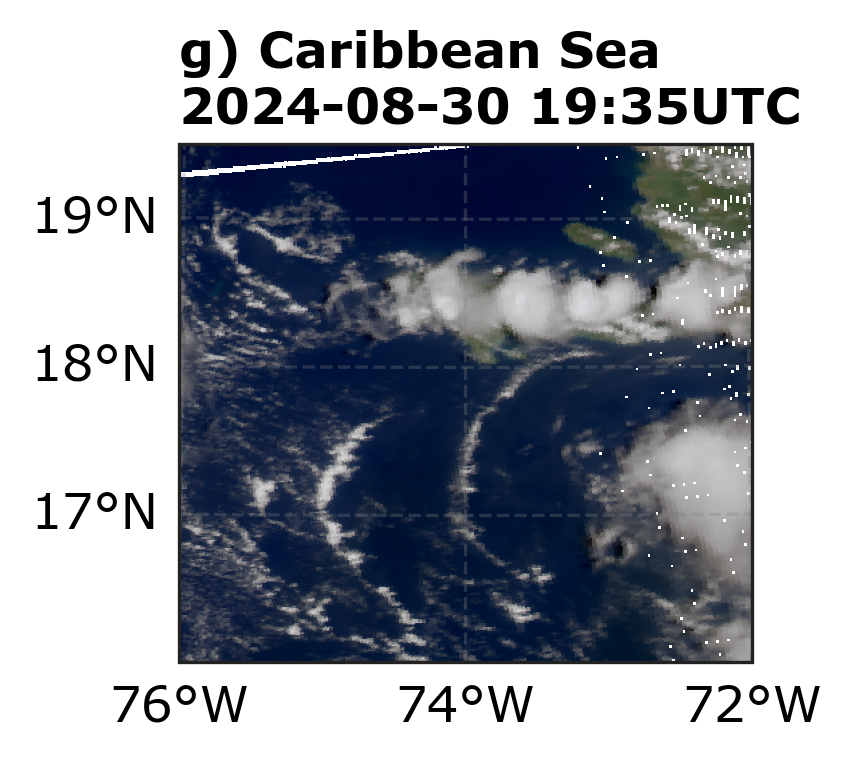

In [10]:
fig = plt.figure(figsize=(3,3), dpi = 300)
ax = fig.add_subplot(1, 1, 1, projection=crs_cs)

# Plot the RGB data (Satpy provides it already gamma-corrected & scaled)
ax.imshow(rgb_cs, origin="upper",
          extent=crs_cs.bounds,
          transform=crs_cs)
gl = ax.gridlines(draw_labels=False, xlocs = range(-76,-71,2), ylocs = range(16,20,1), alpha = 0.3, linestyle = "--", color = "grey")#, xlocs=range(-10,11,5), ylocs=range(30,50,5))
gl.top_labels=False
gl.right_labels=False
gl.left_labels=True
gl.bottom_labels=True
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':12}
gl.ylabel_style={'size':12}
plt.title("g) Caribbean Sea \n" + scn_cs_resample_nc.start_time.strftime("%Y-%m-%d %H:%M") + "UTC", fontsize=12, pad=5.0)

## Imagery from Gulf of Carpenteria case

In [11]:
file_name = glob.glob('./MODIS_GC2/*.hdf')
file_name

['./MODIS_GC2/MOD021KM.A2024093.0035.061.2024093131802.hdf']

In [12]:
scn =Scene(file_name,reader='modis_l1b')

scn

In [13]:
scn.load(["1", "3", "4"])

Let us define a list the composite IDs `natural_color` and `dust`. This list (`composite_ids`) can then be passed to the function `load()`. Per default, scenes are loaded with the nort pole facing downwards. You can specify the keyword argument `upper_right_corner=NE` in order to turn the image around and have the north pole facing upwards.

In [14]:
composite_ids = ['true_color']
scn.load(composite_ids, upper_right_corner='NE')

# enhanced_img = get_enhanced_image(scn["true_color"])

No rsr file /Users/cneumaie/Library/Application Support/pyspectral/rsr_modis_Terra.h5 on disk
No spectral responses for this platform and sensor: Terra modis
Traceback (most recent call last):
  File "/Users/cneumaie/opt/miniconda3/envs/modis/lib/python3.14/site-packages/pyspectral/rayleigh.py", line 306, in _get_rsr_wavelength_from_band_name
    rsr = RelativeSpectralResponse(platform_name, sensor)
  File "/Users/cneumaie/opt/miniconda3/envs/modis/lib/python3.14/site-packages/pyspectral/rsr_reader.py", line 136, in __init__
    self._check_consistent_input()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/cneumaie/opt/miniconda3/envs/modis/lib/python3.14/site-packages/pyspectral/rsr_reader.py", line 151, in _check_consistent_input
    self._check_filename_exist()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/cneumaie/opt/miniconda3/envs/modis/lib/python3.14/site-packages/pyspectral/rsr_reader.py", line 196, in _check_filename_exist
    raise IOError(errmsg)
OSError: pyspectral RSR

In [15]:
%run coord2area_def.py gc_area_1km laea -15.5 -13.5 138 141 1

### +proj=laea +lat_0=-14.5 +lon_0=139.5 +ellps=WGS84

gc_area_1km:
  description: gc_area_1km
  projection:
    proj: laea
    ellps: WGS84
    lat_0: -14.5
    lon_0: 139.5
  shape:
    height: 221
    width: 325
  area_extent:
    lower_left_xy: [-162394.420121, -111179.861810]
    upper_right_xy: [162394.420121, 110118.431528]


In [16]:
from pyresample import get_area_def

area_id = 'gc_area_1km'

x_size = 325
y_size = 221
area_extent = (-162394.420121, -111179.861810,162394.420121, 110118.431528)
projection = '+proj=laea +lat_0=-14.5 +lon_0=139.5 +ellps=WGS84'
description = "Gulf of Carpentaria"
proj_id = 'laea_14_140.5'

areadef = get_area_def(area_id, description, proj_id, projection,x_size, y_size, area_extent)

In [17]:
scn_resample_gc = scn.resample(areadef)

In [18]:
# scn.show('true_color')

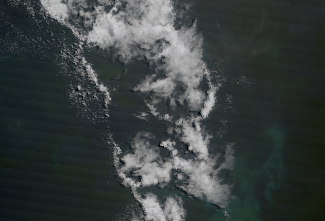

In [19]:
scn_resample_gc.show('true_color')

In [20]:
enhanced_img = get_enhanced_image(scn_resample_gc["true_color"])

In [21]:
rgb_gc = enhanced_img.data.transpose("y","x","bands")

In [22]:
crs_gc = scn_resample_gc["true_color"].attrs["area"].to_cartopy_crs()
style = "/Users/cneumaie/OneDrive - Colostate/Styles/christine-paperlight.mpstyle"
plt.style.use(style)

Duplicate key in file '/Users/cneumaie/OneDrive - Colostate/Styles/christine-paperlight.mpstyle', line 15 ("xtick.color: 'k'")
Duplicate key in file '/Users/cneumaie/OneDrive - Colostate/Styles/christine-paperlight.mpstyle', line 16 ("ytick.color: 'k'")
Duplicate key in file '/Users/cneumaie/OneDrive - Colostate/Styles/christine-paperlight.mpstyle', line 27 ('axes.edgecolor:222222')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17111334..0.82348174].


Text(0.0, 1.0, 'h) Gulf of Carperntaria \n2024-04-02 00:35')

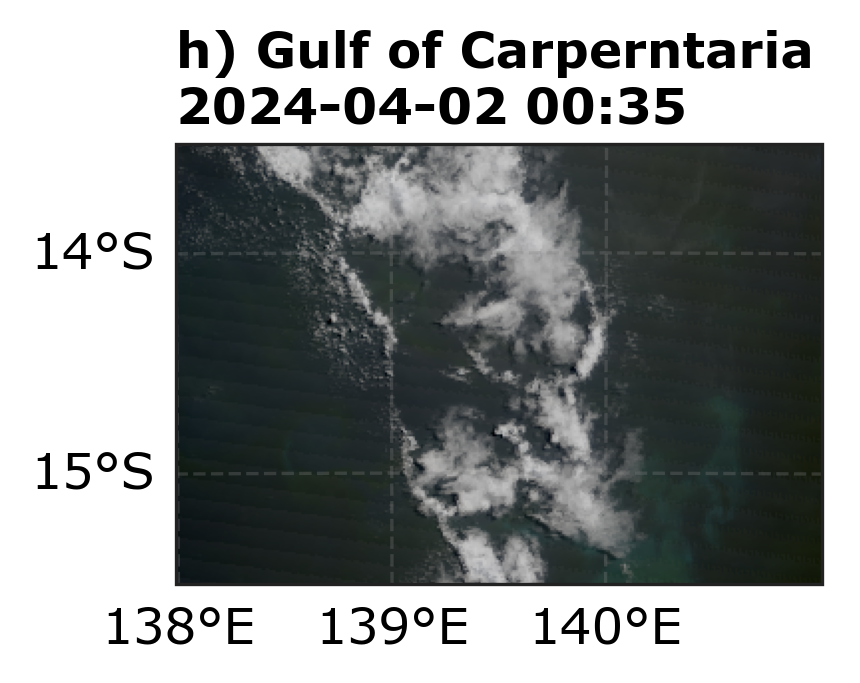

In [24]:
fig = plt.figure(figsize=(3,3), dpi = 300)
ax = fig.add_subplot(1, 1, 1, projection=crs_gc)

# Plot the RGB data (Satpy provides it already gamma-corrected & scaled)
ax.imshow(rgb_gc, origin="upper",
          extent=crs_gc.bounds,
          transform=crs_gc)
gl = ax.gridlines(draw_labels=False, xlocs = range(138,141,1), ylocs = range(-15,-12,1), alpha = 0.3, linestyle = "--", color = "grey")#, xlocs=range(-10,11,5), ylocs=range(30,50,5))
gl.top_labels=False
gl.right_labels=False
gl.left_labels=True
gl.bottom_labels=True
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':12}
gl.ylabel_style={'size':12}
plt.title("h) Gulf of Carperntaria \n" + scn_resample_gc.start_time.strftime("%Y-%m-%d %H:%M"), fontsize=12, pad=5.0)

## Imagery from Indian Ocean

In [25]:
file_name = glob.glob('./MODIS_IO2/*.hdf')
scn_io  =Scene(file_name,reader='modis_l1b')
scn_io.load(["1", "3", "4"])
composite_ids = ['true_color']
scn_io.load(composite_ids, upper_right_corner='NE')

No rsr file /Users/cneumaie/Library/Application Support/pyspectral/rsr_modis_Aqua.h5 on disk
No spectral responses for this platform and sensor: Aqua modis
Traceback (most recent call last):
  File "/Users/cneumaie/opt/miniconda3/envs/modis/lib/python3.14/site-packages/pyspectral/rayleigh.py", line 306, in _get_rsr_wavelength_from_band_name
    rsr = RelativeSpectralResponse(platform_name, sensor)
  File "/Users/cneumaie/opt/miniconda3/envs/modis/lib/python3.14/site-packages/pyspectral/rsr_reader.py", line 136, in __init__
    self._check_consistent_input()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/cneumaie/opt/miniconda3/envs/modis/lib/python3.14/site-packages/pyspectral/rsr_reader.py", line 151, in _check_consistent_input
    self._check_filename_exist()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/cneumaie/opt/miniconda3/envs/modis/lib/python3.14/site-packages/pyspectral/rsr_reader.py", line 196, in _check_filename_exist
    raise IOError(errmsg)
OSError: pyspectral RSR f

In [26]:
## Get inputs for resampleing
%run coord2area_def.py cs_area_1km laea -5.5 -3.5 40.5 43 1

### +proj=laea +lat_0=-4.5 +lon_0=41.75 +ellps=WGS84

cs_area_1km:
  description: cs_area_1km
  projection:
    proj: laea
    ellps: WGS84
    lat_0: -4.5
    lon_0: 41.75
  shape:
    height: 221
    width: 278
  area_extent:
    lower_left_xy: [-138893.626736, -110705.462292]
    upper_right_xy: [138893.626736, 110466.932157]


In [27]:
from pyresample import get_area_def

area_id = 'io_area_1km'

x_size = 278
y_size = 221
area_extent = (-138893.626736, -110705.462292,138893.626736, 110466.932157)
projection = '+proj=laea +lat_0=-4.5 +lon_0=41.75 +ellps=WGS84'
description = "Indian Ocean"
proj_id = 'laea_4_4175'

areadef = get_area_def(area_id, description, proj_id, projection,x_size, y_size, area_extent)
scn_io_resample_nc = scn_io.resample(areadef)

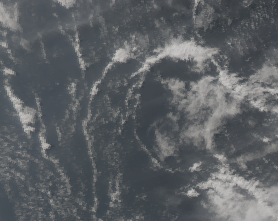

In [28]:
## Check extent
scn_io_resample_nc.show('true_color')

In [29]:
enhanced_img_io = get_enhanced_image(scn_io_resample_nc["true_color"])
rgb_io = enhanced_img_io.data.transpose("y","x","bands")
crs_io = scn_io_resample_nc["true_color"].attrs["area"].to_cartopy_crs()
style = "/Users/cneumaie/OneDrive - Colostate/Styles/christine-paperlight.mpstyle"
plt.style.use(style)

Duplicate key in file '/Users/cneumaie/OneDrive - Colostate/Styles/christine-paperlight.mpstyle', line 15 ("xtick.color: 'k'")
Duplicate key in file '/Users/cneumaie/OneDrive - Colostate/Styles/christine-paperlight.mpstyle', line 16 ("ytick.color: 'k'")
Duplicate key in file '/Users/cneumaie/OneDrive - Colostate/Styles/christine-paperlight.mpstyle', line 27 ('axes.edgecolor:222222')


Text(0.0, 1.0, 'i) Indian Ocean \n2025-08-10 11:45UTC')

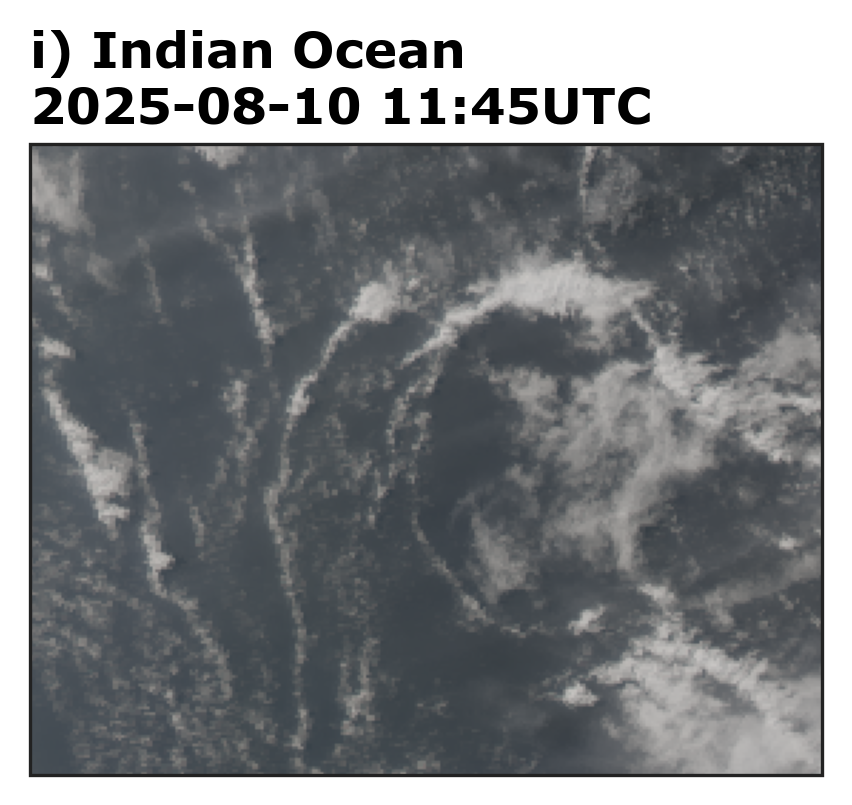

In [31]:
fig = plt.figure(figsize=(3,3), dpi = 300)
ax = fig.add_subplot(1, 1, 1, projection=crs_io)

# Plot the RGB data (Satpy provides it already gamma-corrected & scaled)
ax.imshow(rgb_io, origin="upper",
          extent=crs_io.bounds,
          transform=crs_io)
gl = ax.gridlines(draw_labels=False, xlocs = range(-5,-3,1), ylocs = range(40,44,1), alpha = 0.3, linestyle = "--", color = "grey")#, xlocs=range(-10,11,5), ylocs=range(30,50,5))
gl.top_labels=False
gl.right_labels=False
gl.left_labels=True
gl.bottom_labels=True
gl.xformatter=LONGITUDE_FORMATTER
gl.yformatter=LATITUDE_FORMATTER
gl.xlabel_style={'size':12}
gl.ylabel_style={'size':12}
plt.title("i) Indian Ocean \n" + scn_io_resample_nc.start_time.strftime("%Y-%m-%d %H:%M") + "UTC", fontsize=12, pad=5.0)

## Create the main plot (Figure 1 g-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.104639..0.86274725].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17111334..0.82348174].


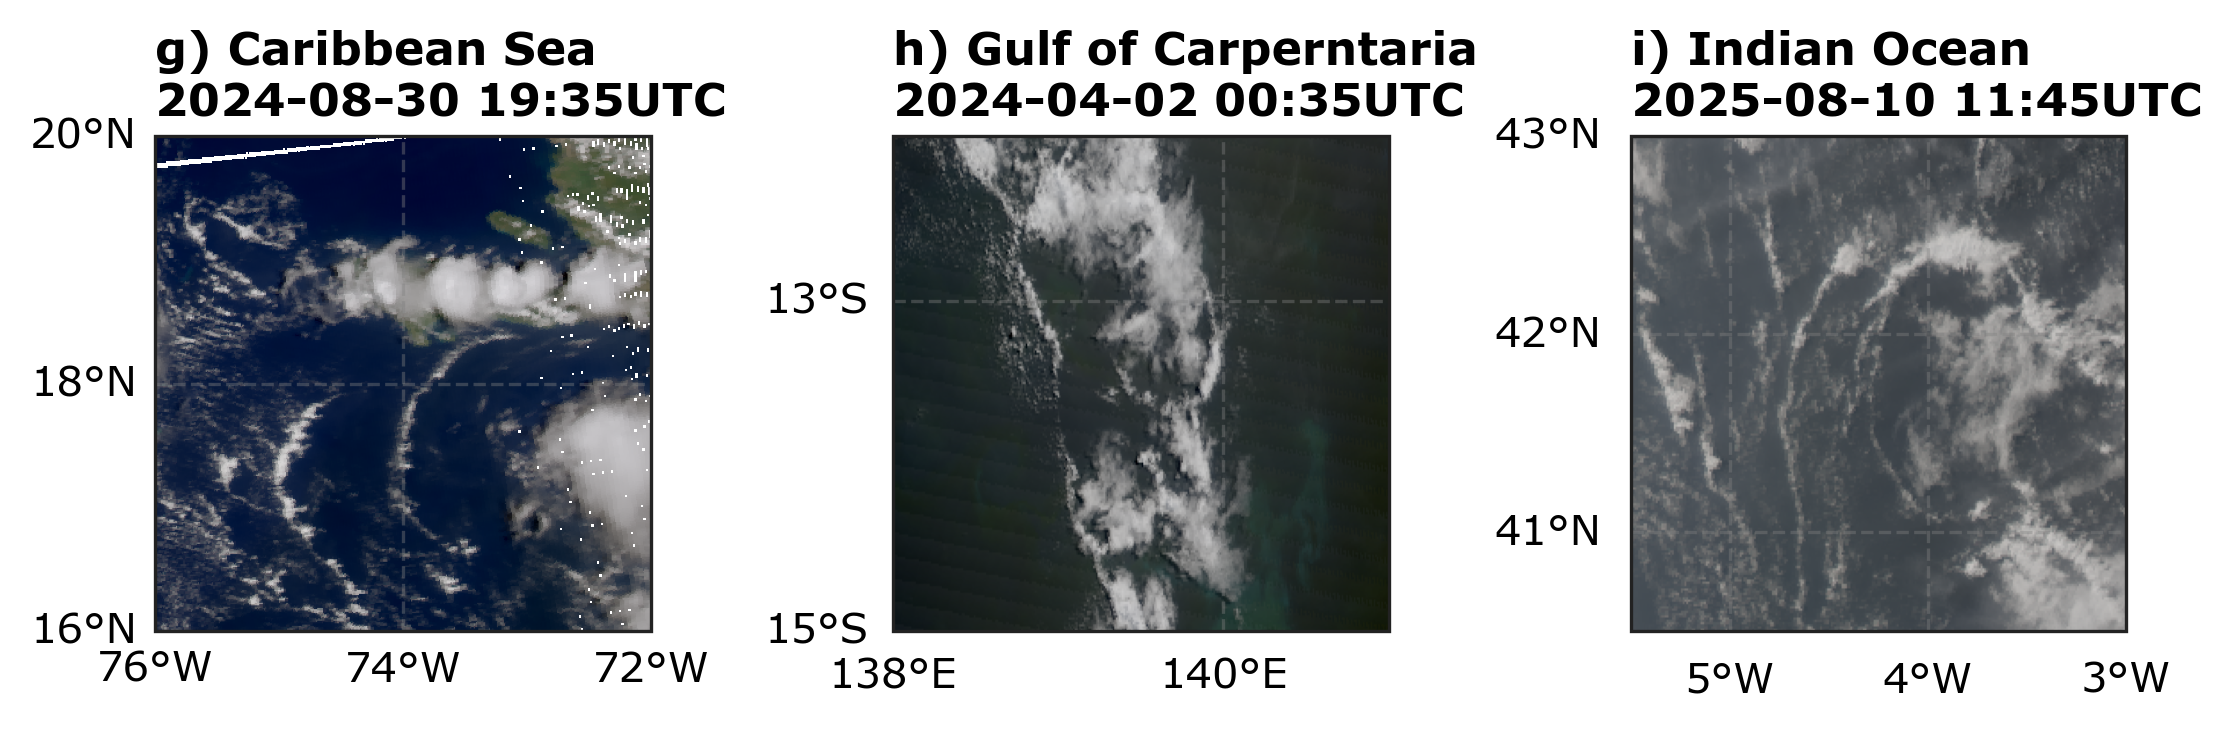

In [33]:
extents = [
    (-76, -72, 16, 20),      # Caribbean Sea
    (138, 141, -15, -12),    # Gulf of Carpentaria
    (-5.5, -3, 40.5, 43)         # Indian Ocean
]

rgbs = [rgb_cs, rgb_gc, rgb_io]
titles = ["g) Caribbean Sea \n" + scn_cs_resample_nc.start_time.strftime("%Y-%m-%d %H:%M") + "UTC",
          "h) Gulf of Carperntaria \n" + scn_resample_gc.start_time.strftime("%Y-%m-%d %H:%M")+"UTC",
          "i) Indian Ocean \n" + scn_io_resample_nc.start_time.strftime("%Y-%m-%d %H:%M") + "UTC"]
# Longitude and latitude ticks for gridlines
lon_ticks = [
    np.arange(-76, -70, 2),
    np.arange(138, 142, 2),
    np.arange(-5, -2, 1)
]

lat_ticks = [
    np.arange(16, 21, 2),
    np.arange(-15, -11, 2),
    np.arange(41, 44, 1)
]

# --- Create figure and subplots ---
fig, axes = plt.subplots(1, 3, figsize=(7.5, 2.5), dpi=300, subplot_kw={'projection': ccrs.PlateCarree()})

for i, ax in enumerate(axes):
    rgb = rgbs[i]
    lon_min, lon_max, lat_min, lat_max = extents[i]

    # Show RGB image
    ax.imshow(rgb, origin='upper', extent=(lon_min, lon_max, lat_min, lat_max),
              transform=ccrs.PlateCarree())

    # Add coastlines
    # ax.coastlines(resolution='10m', linewidth=0.6)

    # Draw gridlines (lines only)
    gl = ax.gridlines(draw_labels=False, xlocs=lon_ticks[i], ylocs=lat_ticks[i],
                      alpha=0.4, linestyle='--', color='grey')

    # --- Add manual labels for all subplots ---
    # Longitude labels at bottom
    for lon in lon_ticks[i]:
        ax.text(lon, lat_min - 0.15, f"{lon if lon > 0 else -lon}°{"E" if lon > 0 else "W"}", ha='center', va='top',
                transform=ccrs.PlateCarree(), fontsize=10)
    # Latitude labels at left
    for lat in lat_ticks[i]:
        ax.text(lon_min - 0.15, lat, f"{lat if lat > 0 else -lat}°{"N" if lat > 0 else "S"}", ha='right', va='center',
                transform=ccrs.PlateCarree(), fontsize=10)

    # Add subplot title (example, replace with your Satpy start_time)
    ax.set_title(titles[i], fontsize=11, pad=5)

plt.tight_layout()
# plt.savefig("Fig1_g-i_v2.png")
plt.show()
plt.close()
